<a href="https://colab.research.google.com/github/Camilo899/IntroduccionIA/blob/main/04%20-%20modelos_no_supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos**


---


---



# **Importando Librearías**

---



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Aq**uisición de Datos**

---



## Accediendo al Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargando Base de Datos (Drive)

In [66]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/UDEA/2023-02/IntroduccionIA/Proyecto/Telco_customer_churn.xlsx')


## ***Cargando de Forma Local***

In [ ]:
import pandas as pd

# Cargar el archivo Excel en un data_2Frame
data = pd.read_excel('/content/Telco_customer_churn.xlsx')

- **Nota**: Los datos de la Base de Datos Provienen de : https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

## **Revisión Inicial**

---



In [67]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Desccripción de Columnas

In [ ]:
print(data.columns)
print('\n',data.shape)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

 (7043, 33)


## Imprimiendo data 2 (Excluyendo algunas Columnas)

In [6]:
columnas_a_excluir = ['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',...]

# Selecciona solo las columnas que no están en la lista de columnas a excluir
data_2= data[data.columns.difference(columnas_a_excluir)]

# Imprime el dataFrame filtrado
print(data_2)

      CLTV Churn Label                   Churn Reason  Churn Score  \
0     3239         Yes   Competitor made better offer           86   
1     2701         Yes                          Moved           67   
2     5372         Yes                          Moved           86   
3     5003         Yes                          Moved           84   
4     5340         Yes  Competitor had better devices           89   
...    ...         ...                            ...          ...   
7038  5306          No                            NaN           45   
7039  2140          No                            NaN           59   
7040  5560          No                            NaN           71   
7041  2793          No                            NaN           59   
7042  5097          No                            NaN           38   

      Churn Value          City        Contract Dependents  \
0               1   Los Angeles  Month-to-month         No   
1               1   Los Angeles  Mo

## **Valores Faltantes**


In [68]:
valores_faltantes = data_2.isnull().sum()
porcentaje_faltantes = data_2.isnull().sum() * 100 / len(data_2)

# Creando un dataFrame con los resultados
df_faltantes = pd.DataFrame({'Valores Faltantes': valores_faltantes, 'Porcentaje Faltantes (%)': porcentaje_faltantes})

df_faltantes.reset_index(inplace=True)
df_faltantes.rename(columns={'index': 'ID'}, inplace=True)

# Imprimiendo los resultados
print(df_faltantes)

                   ID  Valores Faltantes  Porcentaje Faltantes (%)
0                CLTV                  0                       0.0
1         Churn Label                  0                       0.0
2        Churn Reason                  0                       0.0
3         Churn Score                  0                       0.0
4         Churn Value                  0                       0.0
5                City                  0                       0.0
6            Contract                  0                       0.0
7          Dependents                  0                       0.0
8   Device Protection                  0                       0.0
9              Gender                  0                       0.0
10   Internet Service                  0                       0.0
11    Monthly Charges                  0                       0.0
12     Multiple Lines                  0                       0.0
13      Online Backup                  0                      

In [69]:

# Reemplazando valores faltantes
data_2['Churn Reason'] = data_2['Churn Reason'].fillna('No proporcionado')

valores_faltantes = data_2.isnull().sum()
porcentaje_faltantes = data_2.isnull().sum() * 100 / len(data_2)

# Creando un dataFrame con los resultados
df_faltantes = pd.DataFrame({'Valores Faltantes': valores_faltantes, 'Porcentaje Faltantes (%)': porcentaje_faltantes})

df_faltantes.reset_index(inplace=True)
df_faltantes.rename(columns={'index': 'ID'}, inplace=True)

# Imprimiendo los resultados
print(df_faltantes)

                   ID  Valores Faltantes  Porcentaje Faltantes (%)
0                CLTV                  0                       0.0
1         Churn Label                  0                       0.0
2        Churn Reason                  0                       0.0
3         Churn Score                  0                       0.0
4         Churn Value                  0                       0.0
5                City                  0                       0.0
6            Contract                  0                       0.0
7          Dependents                  0                       0.0
8   Device Protection                  0                       0.0
9              Gender                  0                       0.0
10   Internet Service                  0                       0.0
11    Monthly Charges                  0                       0.0
12     Multiple Lines                  0                       0.0
13      Online Backup                  0                      

## Simulación de Datos Faltantes

In [70]:
# Seleccionando Columnas para aplicar datos faltantes
columns = ['Online Backup', 'Streaming TV', 'Phone Service']

for col in columns:
    # Selecciona el 5% de los datos para ser reemplazados
    num_missing = int(len(data_2[col]) * 0.05)

    # Genera índices aleatorios para datos a ser reemplazados
    missing_indices = pd.Index(np.random.choice(data_2[col].index, replace=False, size=num_missing))

    # Reemplaza los datos en los índices seleccionados con NaN
    data_2.loc[missing_indices, col] = np.nan


# Procenjate de datos faltantes
missing_values = data_2.isnull().sum().sum()
total_values = data_2.size

missing_percentage = (missing_values / total_values) * 100

print("Porcentaje de datos faltantes: ", missing_percentage)

Porcentaje de datos faltantes:  0.5997444270907284


In [71]:
missing_values = data_2.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
CLTV                   0
Churn Label            0
Churn Reason           0
Churn Score            0
Churn Value            0
City                   0
Contract               0
Dependents             0
Device Protection      0
Gender                 0
Internet Service       0
Monthly Charges        0
Multiple Lines         0
Online Backup        352
Online Security        0
Paperless Billing      0
Partner                0
Payment Method         0
Phone Service        352
Senior Citizen         0
Streaming Movies       0
Streaming TV         352
Tech Support           0
Tenure Months          0
Total Charges          0
dtype: int64


## Reemplazo de Variables Categóricas por Númericas

In [72]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['City'] = le.fit_transform(data_2['City'])
data_2['Gender'] = le.fit_transform(data_2['Gender'])
data_2['Senior Citizen'] = le.fit_transform(data_2['Senior Citizen'])
data_2['Partner'] = le.fit_transform(data_2['Partner'])
data_2['Dependents'] = le.fit_transform(data_2['Dependents'])
data_2['Phone Service'] = le.fit_transform(data_2['Phone Service'])
# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['Multiple Lines'] = le.fit_transform(data_2['Multiple Lines'])
data_2['Internet Service'] = le.fit_transform(data_2['Internet Service'])
data_2['Online Security'] = le.fit_transform(data_2['Online Security'])
data_2['Online Backup'] = le.fit_transform(data_2['Online Backup'])
data_2['Device Protection'] = le.fit_transform(data_2['Device Protection'])
data_2['Tech Support'] = le.fit_transform(data_2['Tech Support'])
# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['Streaming TV'] = le.fit_transform(data_2['Streaming TV'])
data_2['Streaming Movies'] = le.fit_transform(data_2['City'])
data_2['Contract'] = le.fit_transform(data_2['Contract'])
data_2['Paperless Billing'] = le.fit_transform(data_2['Paperless Billing'])
data_2['Payment Method'] = le.fit_transform(data_2['Payment Method'])
data_2['Churn Label'] = le.fit_transform(data_2['Churn Label'])

## Limpieza de Datos

---



In [73]:

# Paso 3: Eliminar filas con valores faltantes
df_sin_filas_faltantes = data_2.dropna()

# Paso 4: Rellenar valores faltantes con un valor específico (por ejemplo, el promedio de la columna)
promedio_columna_A = data_2['Online Backup'].mean()
#promedio_columna_B = data['Churn Score'].mean()
promedio_columna_C = data_2['Phone Service'].mean()
df_rellenado = data_2.fillna({'Online Backup': promedio_columna_A, 'Streaming TV': 0, 'Phone Service': promedio_columna_C,})  # Rellena CA y CC con el promedio y CB con 0

# Paso 5: Eliminar columnas con valores faltantes
#df_sin_columnas_faltantes = data.dropna(axis=1)

# Paso 6: Interpolación (relleno basado en valores cercanos)
df_interpolado = data_2.interpolate()

# Paso 7: Eliminar duplicados (si es necesario)
df_sin_duplicados = data_2.drop_duplicates()

# Paso 8: Guardar los resultados en un nuevo DataFrame o sobrescribir el original si es apropiado
df = df_sin_filas_faltantes  # Por ejemplo, reemplazar el DataFrame original con uno limpio


# 2. Contar valores faltantes por columna
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
CLTV                 0
Churn Label          0
Churn Reason         0
Churn Score          0
Churn Value          0
City                 0
Contract             0
Dependents           0
Device Protection    0
Gender               0
Internet Service     0
Monthly Charges      0
Multiple Lines       0
Online Backup        0
Online Security      0
Paperless Billing    0
Partner              0
Payment Method       0
Phone Service        0
Senior Citizen       0
Streaming Movies     0
Streaming TV         0
Tech Support         0
Tenure Months        0
Total Charges        0
dtype: int64


## Exploración Inicial

---



Primeras filas del dataset:
   CLTV  Churn Label                   Churn Reason  Churn Score  Churn Value  \
0  3239            1   Competitor made better offer           86            1   
1  2701            1                          Moved           67            1   
2  5372            1                          Moved           86            1   
3  5003            1                          Moved           84            1   
4  5340            1  Competitor had better devices           89            1   

   City  Contract  Dependents  Device Protection  Gender  ...  \
0   562         0           0                  0       1  ...   
1   562         0           1                  0       0  ...   
2   562         0           1                  2       0  ...   
3   562         0           1                  2       0  ...   
4   562         0           1                  2       1  ...   

   Paperless Billing  Partner  Payment Method  Phone Service  Senior Citizen  \
0             

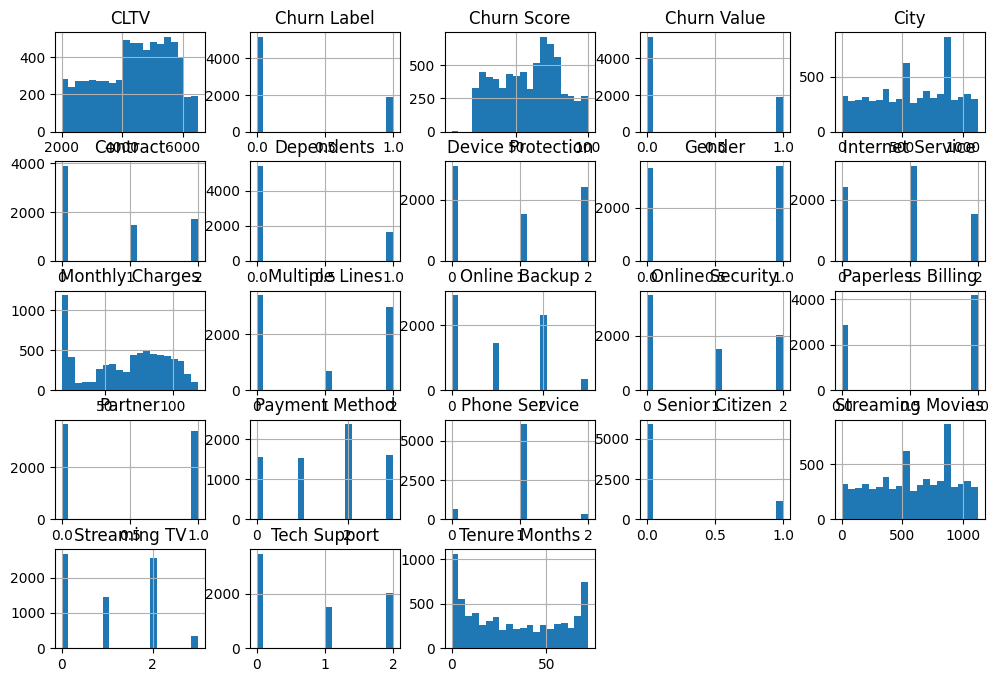


Boxplots de variables numéricas:


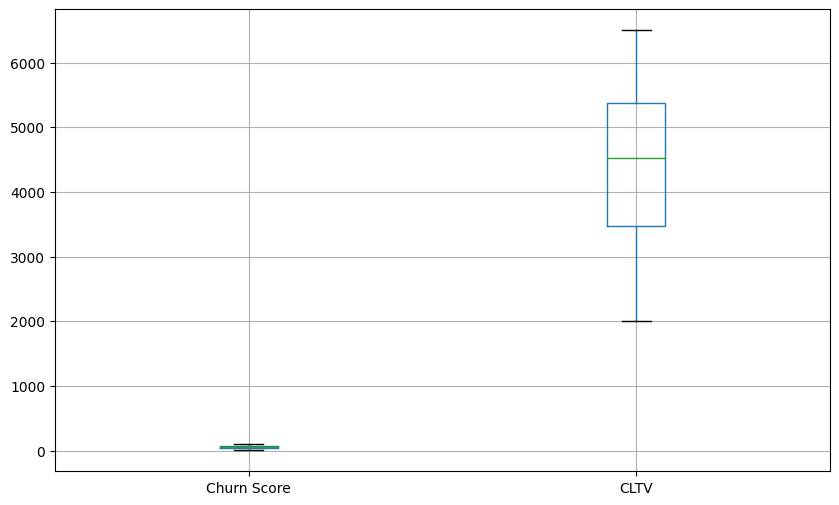


Gráfico de barras de variables categóricas:


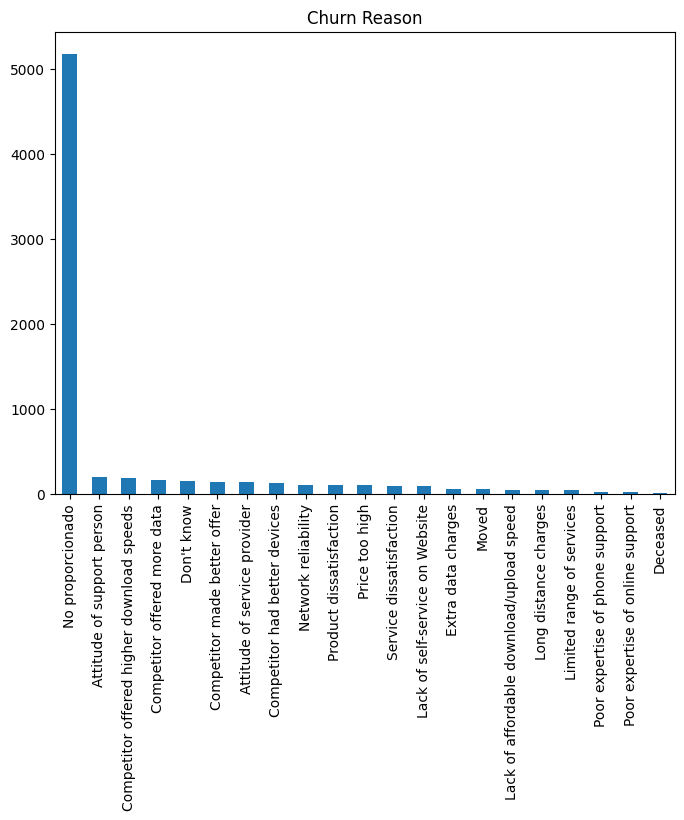

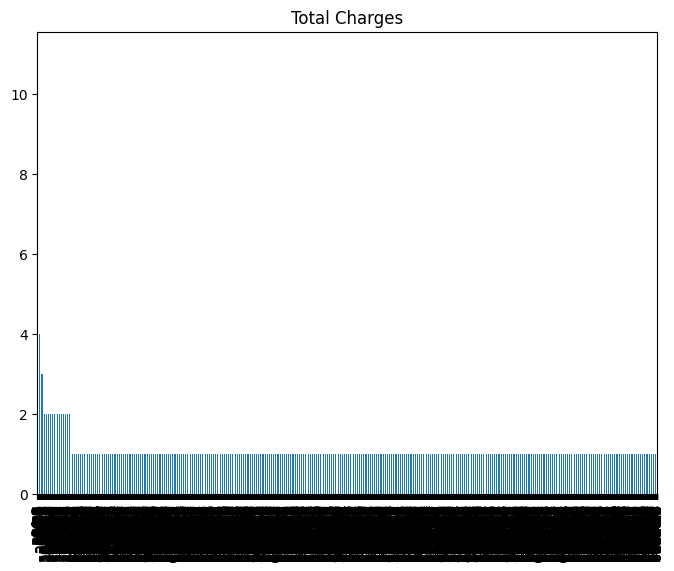

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Obtener información general del dataset
print("\n----------Información general del dataset:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\n----------Resumen estadístico de las variables numéricas:")
print(df.describe())

# Conteo de valores únicos en variables categóricas
print("\n------------Conteo de valores únicos en variables categóricas:")
categoricas = df.select_dtypes(include=['object'])  # Seleccionar variables categóricas
for columna in categoricas.columns:
    print(f"Variable: {columna}")
    print(df[columna].value_counts())

# Histogramas de variables numéricas
import matplotlib.pyplot as plt

print("\nHistogramas de variables numéricas:")
df.hist(bins=20, figsize=(12, 8))
plt.show()

# Boxplots de variables numéricas
print("\nBoxplots de variables numéricas:")
df.boxplot(column=['Churn Score', 'CLTV'], figsize=(10, 6))
plt.show()

# Gráfico de barras de variables categóricas
print("\nGráfico de barras de variables categóricas:")
for columna in categoricas.columns:
    plt.figure(figsize=(8, 6))
    df[columna].value_counts().plot(kind='bar', title=columna)
    plt.show()


## ***Normalizando Variables Númericas***

---



In [74]:
# Creando el normalizador
scaler = MinMaxScaler()

# Seleccionando solo las columnas numéricas para normalizar
num_cols = data_2.select_dtypes(include=[np.number]).columns

# Normalizando las columnas numéricas
data_2[num_cols] = scaler.fit_transform(data_2[num_cols])

# Imprimiendo los resultados
print(data_2)


          CLTV  Churn Label                   Churn Reason  Churn Score  \
0     0.274850          1.0   Competitor made better offer     0.852632   
1     0.155215          1.0                          Moved     0.652632   
2     0.749166          1.0                          Moved     0.852632   
3     0.667111          1.0                          Moved     0.831579   
4     0.742050          1.0  Competitor had better devices     0.884211   
...        ...          ...                            ...          ...   
7038  0.734490          0.0               No proporcionado     0.421053   
7039  0.030465          0.0               No proporcionado     0.568421   
7040  0.790972          0.0               No proporcionado     0.694737   
7041  0.175673          0.0               No proporcionado     0.568421   
7042  0.688014          0.0               No proporcionado     0.347368   

      Churn Value      City  Contract  Dependents  Device Protection  Gender  \
0             1.0  

## ***Generando un primer Modelo de Predicción según Churn Score y CLTV`***

---



## **Métodos Supervisados**

## Modelo Regression Logistic

---



In [111]:
# Seleccionando las características y la variable objetivo
X = data_2[['Churn Score', 'CLTV']]
y = data_2['Churn Value']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
# Creando el modelo
model = LogisticRegression()

In [113]:
# Entrenando el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [114]:
# Haciendo predicciones
y_pred = model.predict(X_test)

In [115]:
# Evaluando el modelo
print('Exactitud del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))

Exactitud del modelo: 0.8445706174591909
Sensibilidad del modelo: 0.6525
Precisión del modelo: 0.7653958944281525
F1 del modelo: 0.7044534412955464
ROC del modelo: 0.7866067888999009


- Exactitud (Accuracy): Esta métrica es útil para tener una visión general de cuántas predicciones son correctas, independientemente de si son positivas o negativas.

- Recall (Sensibilidad): Esta métrica es especialmente útil en este contexto porque se quiere identificar a los clientes que probablemente abandonarán. Un recall alto significa que se está identificando correctamente a la mayoría de los clientes que abandonarán.

- Precision: Esta métrica también es útil porque se quiere asegurar de que los clientes que se identifican como propensos a abandonar realmente lo hagan. Una precisión alta significa que la mayoría de los clientes que se identifican como propensos a abandonar realmente lo hacen.

- F1 Score: Esta métrica combina la precisión y el recall en un solo número, lo cual es útil si se quiere equilibrar estos dos aspectos.

- AUC-ROC: Esta métrica es útil para evaluar el rendimiento general del modelo, independientemente del umbral de clasificación que se elija.

## Predicción (Logistic Regression)

In [116]:
# Identificando a los clientes de alto valor que probablemente abandonarán
clientes_alto_valor = data_2[(data_2['CLTV'] > data_2['CLTV'].mean()) & (data_2['Churn Score'] > 50)]
print('Clientes de alto valor que probablemente abandonarán:', len(clientes_alto_valor))

Clientes de alto valor que probablemente abandonarán: 0


- En este código, además de entrenar un modelo para predecir el abandono del cliente, también identificamos a los clientes de alto valor (aquellos con un CLTV mayor que la media) que tienen una alta probabilidad de abandonar (aquellos con un Churn Score mayor que 50)

## Mejor Hiperparámetro (LogisticRegression)

---



In [22]:
# Definiendo los parámetros para la búsqueda aleatoria
parametros_logisticos = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creando el modelo
#modelo_logistico = LogisticRegression()

# Creando la búsqueda aleatoria
busqueda_logistica = RandomizedSearchCV(model, parametros_logisticos, cv=5)

# Ajustando el modelo
busqueda_logistica.fit(X_train, y_train)

# Imprimiendo los mejores parámetros
print('Mejores parámetros para la regresión logística:', busqueda_logistica.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros para la regresión logística: {'C': 0.1}


- Este código, RandomizedSearchCV, realiza una búsqueda aleatoria para encontrar los mejores hiperparámetros para el modelo de regresión logística.

- El modelo de regresión logística ha encontrado que el mejor parámetro para ‘C’ es 0.1. Esto significa que este valor de ‘C’ proporciona el mejor rendimiento en términos de ajuste del modelo a los datos de entrenamiento y validación durante la búsqueda en cuadrícula.

In [81]:
# Creando el modelo con el mejor parámetro 'C'
modelo_logistico = LogisticRegression(C=0.1)

# Entrenando el modelo
modelo_logistico.fit(X_train, y_train)

# Haciendo predicciones
y_pred = modelo_logistico.predict(X_test)

# Evaluando el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))

Precisión del modelo: 0.8523775727466288
Sensibilidad del modelo: 0.5775
Precisión del modelo: 0.8555555555555555
F1 del modelo: 0.6895522388059702
ROC del modelo: 0.7694239345887017


## Curva de Aprendizaje (Logistic Regression)

---



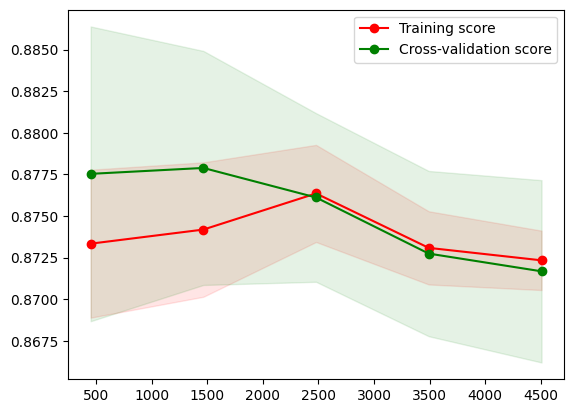

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que X_train e y_train son tus datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_train, y_train)

# Calculando las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Dibujando las curvas de aprendizaje
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


- En el gráfico, el eje x representa el tamaño del conjunto de entrenamiento y el eje y representa la puntuación de precisión. La línea roja muestra la puntuación de precisión del modelo en el conjunto de entrenamiento, mientras que la línea verde muestra la puntuación de precisión en el conjunto de validación cruzada.

- A medida que el tamaño del conjunto de entrenamiento aumenta, la precisión del modelo en el conjunto de entrenamiento disminuye ligeramente, lo cual es normal ya que es más difícil ajustar a un mayor número de datos. Sin embargo, la precisión en el conjunto de validación cruzada aumenta, lo que indica que el modelo está aprendiendo de los datos adicionales y generalizando mejor a datos no vistos.

- El hecho de que las dos líneas converjan sugiere que el modelo podría no beneficiarse significativamente de más datos de entrenamiento. En este punto, podrías considerar otras formas de mejorar el rendimiento del modelo, como ajustar los parámetros del modelo, probar un modelo diferente, o recoger más características de los datos

## Modelo Random Forest

---



In [117]:
# Seleccionando las características y la variable objetivo
X = data_2[['Churn Score', 'CLTV', 'Gender']]
y = data_2['Churn Value']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo los hiperparámetros para la búsqueda aleatoria
hyperparameters = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 10, 20, 30, 40, 50]}

# Creando el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Creando el objeto de búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparameters, random_state=42)

# Entrenando el modelo
model.fit(X_train, y_train)

# Haciendo predicciones
y_pred = model.predict(X_test)

# Evaluando el modelo
print('Exactitud del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))


Exactitud del modelo: 0.850958126330731
Sensibilidad del modelo: 0.6625
Precisión del modelo: 0.7794117647058824
F1 del modelo: 0.7162162162162162
ROC del modelo: 0.7940844895936571


In [27]:
# Ajustando el modelo y realizando la búsqueda aleatoria
random_search.fit(X_train, y_train)
# Imprimiendo los mejores hiperparámetros
best_params = random_search.best_params_
print('Los mejores hiperparámetros son:', best_params)


Los mejores hiperparámetros son: {'n_estimators': 400, 'max_depth': 10}


## Predicción (Random Forest)

In [118]:
# Creando un DataFrame con las predicciones y el sexo de los clientes
results = pd.DataFrame({'Prediction': y_pred, 'Gender': X_test['Gender']})

# Segmentando los resultados por sexo
male_results = results[results['Gender'] == 0]
female_results = results[results['Gender'] == 1]

print('Resultados para hombres:')
print(male_results['Prediction'].value_counts())

print('Resultados para mujeres:')
print(female_results['Prediction'].value_counts())

Resultados para hombres:
0.0    540
1.0    176
Name: Prediction, dtype: int64
Resultados para mujeres:
0.0    529
1.0    164
Name: Prediction, dtype: int64


- Según las predicciones del modelo, de los clientes hombres, 540 se quedarán y 176 probablemente abandonarán la compañía. En cuanto a las clientes mujeres, 529 se quedarán y 164 probablemente abandonarán la compañía.

## Curva de Aprendizaje Modelo Random Forest

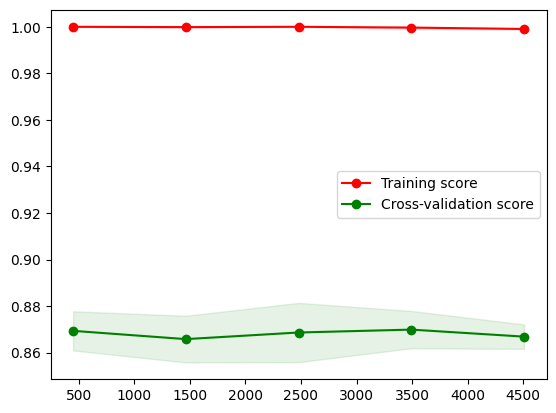

In [29]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que X_train e y_train son tus datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train)

# Calculando las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Dibujando las curvas de aprendizaje
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


- En el gráfico, la línea roja representa la precisión en el conjunto de entrenamiento y la línea verde representa la precisión en el conjunto de validación cruzada. A medida que el tamaño del conjunto de entrenamiento aumenta, la precisión del modelo en el conjunto de entrenamiento se mantiene constante (cerca de 1.0), lo cual es típico para los modelos de Random Forest ya que son propensos a sobreajustar a los datos de entrenamiento.

- Por otro lado, la precisión en el conjunto de validación cruzada aumenta inicialmente y luego parece estabilizarse. Esto sugiere que el modelo está aprendiendo de los datos adicionales al principio, pero después de cierto punto, más datos de entrenamiento no mejoran significativamente la precisión en el conjunto de validación cruzada.

- Esto puede indicar que has alcanzado un punto de rendimientos decrecientes con respecto a la cantidad de datos de entrenamiento. A partir de aquí, podrías considerar otras formas de mejorar el rendimiento del modelo, como ajustar los parámetros del modelo, probar un modelo diferente, o recoger más características de los datos.

## Modelos No Supervisados

---



In [107]:
data_3 = data_2.select_dtypes(include=[np.number])

display(data_3)

,CLTV,Churn Label,Churn Score,Churn Value,City,Contract,Dependents,Device Protection,Gender,Internet Service,...,Online Security,Paperless Billing,Partner,Payment Method,Phone Service,Senior Citizen,Streaming Movies,Streaming TV,Tech Support,Tenure Months
0,0.274850,1.0,0.852632,1.0,0.498227,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.000000,0.333333,0.0,0.498227,0.00,0.0,0.027778
1,0.155215,1.0,0.652632,1.0,0.498227,0.0,1.0,0.0,0.0,0.5,...,0.0,1.0,0.0,0.666667,1.000000,0.0,0.498227,0.00,0.0,0.027778
2,0.749166,1.0,0.852632,1.0,0.498227,0.0,1.0,1.0,0.0,0.5,...,0.0,1.0,0.0,0.666667,0.333333,0.0,0.498227,0.50,0.0,0.111111
3,0.667111,1.0,0.831579,1.0,0.498227,0.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,0.666667,0.333333,0.0,0.498227,0.50,1.0,0.388889
4,0.742050,1.0,0.884211,1.0,0.498227,0.0,1.0,1.0,1.0,0.5,...,0.0,1.0,0.0,0.000000,0.333333,0.0,0.498227,0.50,0.0,0.680556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.734490,0.0,0.421053,0.0,0.461879,1.0,0.0,0.5,0.0,1.0,...,0.5,1.0,0.0,0.000000,0.333333,0.0,0.461879,0.25,0.5,1.000000
7039,0.030465,0.0,0.568421,0.0,0.001773,0.5,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.000000,0.333333,0.0,0.001773,0.50,1.0,0.333333
7040,0.790972,0.0,0.694737,0.0,0.019504,0.5,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,0.333333,0.333333,0.0,0.019504,0.50,0.0,1.000000
7041,0.175673,0.0,0.568421,0.0,0.023050,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.666667,0.000000,0.0,0.023050,0.00,0.0,0.152778


In [44]:
print(data_3.columns)
print('\n',data_3.shape)

Index(['CLTV', 'Churn Label', 'Churn Score', 'Churn Value', 'City', 'Contract',
       'Dependents', 'Device Protection', 'Gender', 'Internet Service',
       'Monthly Charges', 'Multiple Lines', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service',
       'Senior Citizen', 'Streaming Movies', 'Streaming TV', 'Tech Support',
       'Tenure Months'],
      dtype='object')

 (7043, 23)


##Entrenamiento de Datos

In [119]:
pca_pipe = make_pipeline(StandardScaler(), PCA()) # Escalando los datos
pca_pipe.fit(data_3)
modelo_pca = pca_pipe.named_steps['pca'] # Se extrae el modelo entrenado del pipeline

##Técnicas de Agrupamiento

## Curva de Jambú

---



**1. Codo de Jambú**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

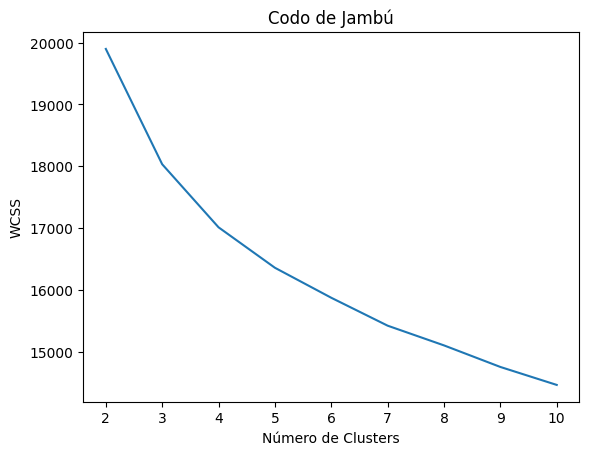

In [108]:
wcss = [] # Creación de lista vacía

for i in range (2,11):
  kmeans = KMeans (n_clusters = i, max_iter= 400) # Realizando interaciones
  kmeans.fit (data_3)
  wcss.append (kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title ("Codo de Jambú")
plt.xlabel ('Número de Clusters')
plt.ylabel ('WCSS') # Indicador de similitud
plt.show()

- El gráfico muestra los resultados del método del codo para determinar el número óptimo de grupos para el algoritmo K-means. El método del codo implica trazar la suma de las distancias al cuadrado dentro del grupo (WCSS) en función del número de grupos.

- En este gráfico, el eje x representa el número de grupos y el eje y representa la WCSS. La línea azul muestra cómo cambia la WCSS a medida que aumenta el número de grupos.

- El "codo" en la gráfica, que es el punto donde la tasa de disminución de la WCSS se suaviza significativamente, sugiere el número óptimo de grupos. En este caso, parece que el codo está alrededor de 4 o 5, lo que sugiere que 4 o 5 podría ser un buen número de grupos para los datos.

**2. Varianza Explicada**

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.80437986e-01 1.09994684e-01 8.69230428e-02 6.07433874e-02
 5.16205125e-02 5.00649819e-02 4.37047727e-02 4.29331141e-02
 4.21622203e-02 3.96433093e-02 3.77888339e-02 3.61663192e-02
 3.35229979e-02 3.23287863e-02 3.12248991e-02 2.99818351e-02
 2.52007327e-02 2.15961323e-02 1.82260614e-02 1.58623403e-02
 9.87305073e-03 7.74980915e-33 1.23699973e-33]


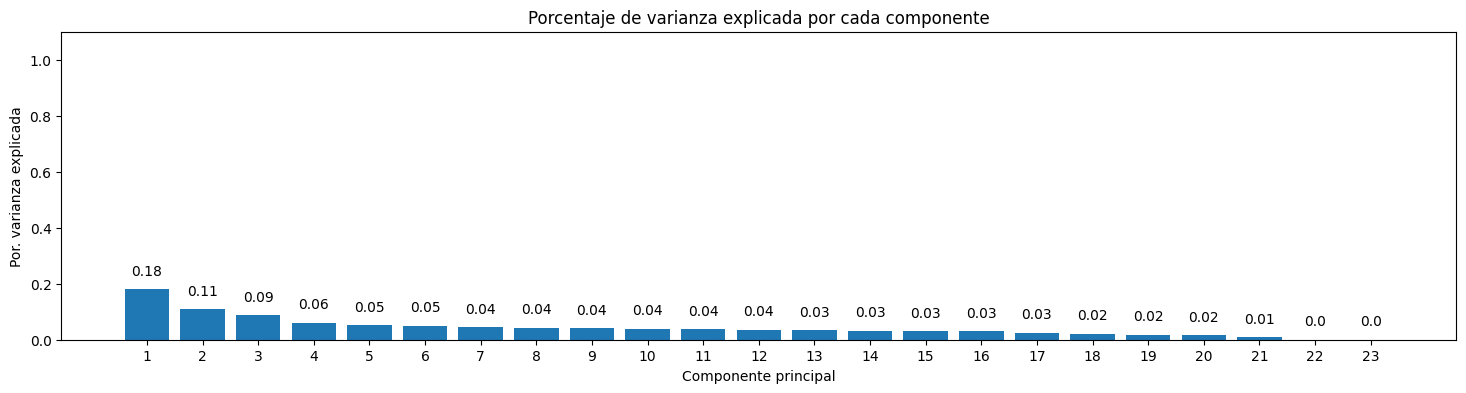

In [109]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_3.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

**3. Varinaza Explicada Acumulada**

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.18043799 0.29043267 0.37735571 0.4380991  0.48971961 0.53978459
 0.58348937 0.62642248 0.6685847  0.70822801 0.74601685 0.78218316
 0.81570616 0.84803495 0.87925985 0.90924168 0.93444242 0.95603855
 0.97426461 0.99012695 1.         1.         1.        ]


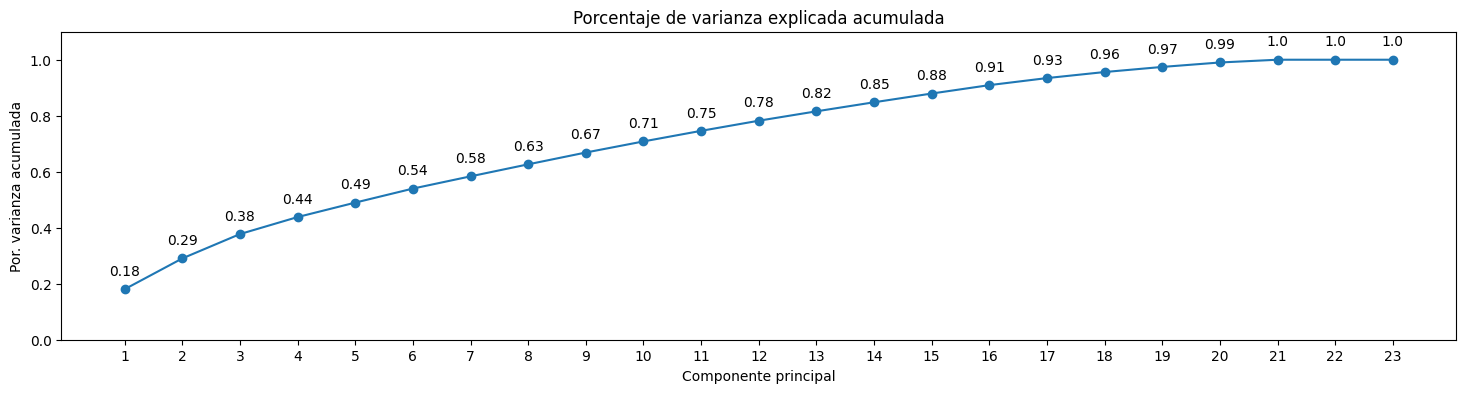

In [110]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
ax.plot(
    np.arange(len(data_3.columns)) + 1,
    prop_varianza_acum,

    marker = 'o'
)

for x, y in zip(np.arange(len(data_3.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

**Implementación de K-Means**

In [120]:
kmeans = KMeans(n_clusters=5).fit(data_3)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 4.86231988e-01 -1.55431223e-15  4.75870664e-01 -1.55431223e-15
   5.15130304e-01  8.45737483e-02  6.49526387e-02  2.37144790e-01
   5.18267930e-01  2.72665765e-01  5.09367910e-01  4.63125846e-01
   2.31224628e-01  2.01285521e-01  7.53721245e-01  2.41542625e-01
   5.60667569e-01  3.49571493e-01  2.28010825e-01  5.15130304e-01
   2.42895805e-01  1.98579161e-01  3.28296497e-01]
 [ 6.69677791e-01  2.46831221e-02  4.86085460e-01  2.46831221e-02
   5.27921096e-01  7.63509006e-01  1.49432955e-01  7.83855904e-01
   4.69646431e-01  2.91194129e-01  6.49164119e-01  7.74516344e-01
   4.01100734e-01  6.99132755e-01  6.51100734e-01  7.49166111e-01
   3.25772737e-01  3.53569046e-01  1.74116077e-01  5.27921096e-01
   4.02101401e-01  7.28485657e-01  8.32740345e-01]
 [ 4.71159086e-01  1.00000000e+00  8.15861493e-01  1.00000000e+00
   5.28495441e-01  5.44608648e-02  5.63765736e-02  3.08429119e-01
   4.93705528e-01  4.08593322e-01  5.55071386e-01  4.92610837e-01
   2.27422003e-01  1.73234811e-01  7.542

**Adicionando Clasificación al Objeto Original**

In [98]:
data_3['KMeans_Clusters'] = kmeans.labels_
data_3.head()

,CLTV,Churn Label,Churn Score,Churn Value,City,Contract,Dependents,Device Protection,Gender,Internet Service,...,Paperless Billing,Partner,Payment Method,Phone Service,Senior Citizen,Streaming Movies,Streaming TV,Tech Support,Tenure Months,KMeans_Clusters
0,0.274850,1.0,0.852632,1.0,0.498227,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.000000,0.333333,0.0,0.498227,0.0,0.0,0.027778,1
1,0.155215,1.0,0.652632,1.0,0.498227,0.0,1.0,0.0,0.0,0.5,...,1.0,0.0,0.666667,1.000000,0.0,0.498227,0.0,0.0,0.027778,1
2,0.749166,1.0,0.852632,1.0,0.498227,0.0,1.0,1.0,0.0,0.5,...,1.0,0.0,0.666667,0.333333,0.0,0.498227,0.5,0.0,0.111111,1
3,0.667111,1.0,0.831579,1.0,0.498227,0.0,1.0,1.0,0.0,0.5,...,1.0,1.0,0.666667,0.333333,0.0,0.498227,0.5,1.0,0.388889,1
4,0.742050,1.0,0.884211,1.0,0.498227,0.0,1.0,1.0,1.0,0.5,...,1.0,0.0,0.000000,0.333333,0.0,0.498227,0.5,0.0,0.680556,1


**Conformación del Método PCA**

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca_Datos = pca.fit_transform(data_3)
#pca_Datos = pca.fit_transform(Datos_nor)
pca_Datos_df = pd.DataFrame (data=pca_Datos, columns=['Componente_1', 'Componente_2','Componente_3', 'Componente_4', 'Componente_5'],)
pca_nombres_Datos = pd.concat([pca_Datos_df, data_3[['KMeans_Clusters']]], axis=1)

pca_nombres_Datos

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,KMeans_Clusters
0,-0.907016,-1.235910,-0.373489,-0.454737,0.313151,1
1,-0.733032,-1.348555,0.106476,0.564976,0.270656,1
2,-0.966634,-0.841830,0.699875,0.513395,0.177634,1
3,-0.980313,-0.169434,1.098379,0.564855,0.651666,1
4,-1.016354,-0.525426,0.902391,-0.484280,0.215122,1
...,...,...,...,...,...,...
7038,1.219307,0.421657,-0.367100,0.482570,-0.408138,3
7039,-1.639232,1.046368,0.262938,-0.466573,0.051061,0
7040,2.067403,0.542204,1.414459,0.524223,-0.377106,4
7041,2.295442,-0.168890,0.635277,0.600821,-0.316535,4


**Graficando Clusters Elegidos**

<function matplotlib.pyplot.show(close=None, block=None)>

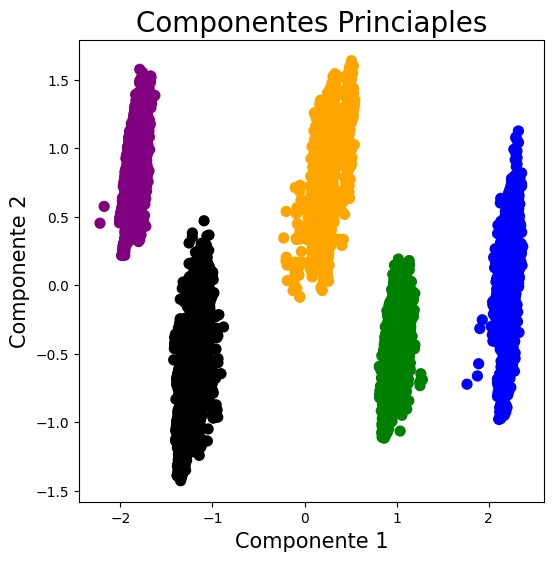

In [52]:
fig = plt.figure (figsize=(6,6)) # Creand figura de 6*6

ax = fig.add_subplot (1,1,1) # Se crea un sólo gráfico

ax.set_xlabel ('Componente 1', fontsize = 15)
ax.set_ylabel ('Componente 2', fontsize = 15)

ax.set_title ('Componentes Princiaples', fontsize = 20)

color = np.array (["blue", "green", "orange", "black", "purple"])
ax.scatter (x = pca_nombres_Datos.Componente_1, y = pca_nombres_Datos.Componente_2, c = color[pca_nombres_Datos.KMeans_Clusters], s = 50)
#c=color[pca_nombres_Datos.KMeans_Clusters], s = 50
plt.show

## Mejores hiperparámetros (KMeans)

In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Asumiendo que las columnas 0, 1 y 2 son tus características de interés
X = data_3.iloc[:, [0, 1, 2]]

# Creando el pipeline
pipe = Pipeline([
    ('pca', PCA()),
    ('kmeans', KMeans(random_state=42))
])

# Definiendo los hiperparámetros para la búsqueda en cuadrícula
params = {
    'pca__n_components': [2, 3],
    'kmeans__n_clusters': [2, 3, 4]
}

# Creando el objeto de búsqueda en cuadrícula
grid = GridSearchCV(pipe, params, cv=5)

# Ajustando el modelo y realizando la búsqueda en cuadrícula
grid.fit(X)

# Imprimiendo los mejores hiperparámetros
print('Los mejores hiperparámetros para PCA + KMeans son:', grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Los mejores hiperparámetros para PCA + KMeans son: {'kmeans__n_clusters': 4, 'pca__n_components': 2}


## Coenficiente de Silueta (DBSCAN)

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Asumiendo que las columnas 1, 2 y 3 son tus características de interés
X = data_3.iloc[:, [1, 2, 3]]

# Creando el modelo DBSCAN
dbscan = DBSCAN(eps= 0.009, min_samples=9)

# Ajustando el modelo
dbscan.fit(X)

# Calculando el coeficiente de silueta
silhouette = silhouette_score(X, dbscan.labels_)

print('Coeficiente de silueta para DBSCAN con eps=0.009 y min_samples=9:', silhouette)


Coeficiente de silueta para DBSCAN con eps=0.009 y min_samples=9: 0.9998565703737747


In [55]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.009, min_samples=9)

# Ajustando DBSCAN a tus datos
dbscan.fit(data_3)

# Obteniendo las nuevas etiquetas
labels = dbscan.labels_


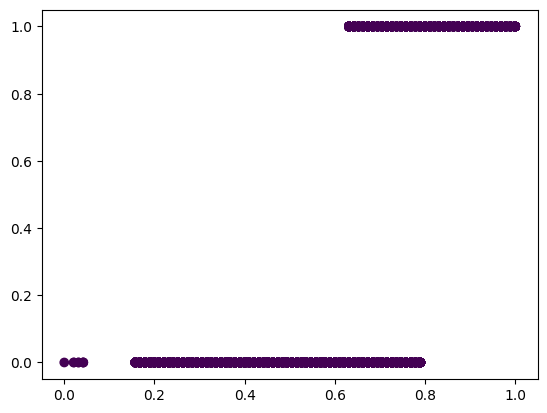

In [56]:
# Asegurándote de que los datos y las etiquetas tienen la misma longitud
assert len(data_3.iloc[:, 2]) == len(labels)
assert len(data_3.iloc[:, 3]) == len(labels)

# Creando una figura y un eje
fig, ax = plt.subplots()

# Dibujando los puntos, coloreados por sus etiquetas de grupo
scatter = ax.scatter(data_3.iloc[:, 2], data_3.iloc[:, 3], c=labels)

# Mostrando la figura
plt.show()


In [57]:
print(data_3.columns)
print('\n',data_3.shape)

Index(['CLTV', 'Churn Label', 'Churn Score', 'Churn Value', 'City', 'Contract',
       'Dependents', 'Device Protection', 'Gender', 'Internet Service',
       'Monthly Charges', 'Multiple Lines', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service',
       'Senior Citizen', 'Streaming Movies', 'Streaming TV', 'Tech Support',
       'Tenure Months', 'KMeans_Clusters'],
      dtype='object')

 (7043, 24)


## Evaluando Modelos de Agrupamiento

---



In [58]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Asumiendo que X es tu conjunto de datos
X = data_3[['CLTV', 'Churn Label']]

# Creando el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Evaluando el modelo KMeans
kmeans_score = silhouette_score(X, kmeans_labels)
print('Puntuación de silueta para KMeans:', kmeans_score)

# Creando el modelo DBSCAN
dbscan = DBSCAN(eps=0.009, min_samples=9)
dbscan_labels = dbscan.fit_predict(X)

# Evaluando el modelo DBSCAN
try:
    dbscan_score = silhouette_score(X, dbscan_labels)
    print('Puntuación de silueta para DBSCAN:', dbscan_score)
except ValueError:
    print('DBSCAN produjo menos de 2 grupos, por lo que la puntuación de silueta no puede ser calculada.')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Puntuación de silueta para KMeans: 0.7215884794438193
Puntuación de silueta para DBSCAN: 0.5730777987189565


- Las puntuaciones de silueta obtenidas indican cómo de bien se han agrupado tus datos. La puntuación de silueta varía de -1 a 1, donde un valor cercano a 1 indica que los puntos están muy cerca de otros puntos en el mismo grupo y muy lejos de los puntos en otros grupos, lo que es deseable. Un valor cercano a -1 indica que los puntos están lejos de otros puntos en el mismo grupo y cerca de los puntos en otros grupos, lo que no es deseable.

- En este caso, la puntuación de silueta para KMeans es 0.7215884794438193, lo que indica que los grupos formados por KMeans son densos y bien separados.

- La puntuación de silueta para DBSCAN es 0.5730777987189565, lo que indica que los grupos formados por DBSCAN son razonablemente densos y bien separados, pero no tanto como los grupos formados por KMeans.

- Esto sugiere que, para este conjunto de datos y estos parámetros, KMeans ha hecho un mejor trabajo al agrupar tus datos que DBSCAN.

## Encontrando Mejores Hiperparámetros (Combinación de Algoritmos)

---



## Combinación 1: KMeans + Regresión Logística

---



In [59]:
kmeans = KMeans()
logreg = LogisticRegression()

X = data_3.drop('Churn Label', axis=1)  # todas las características excepto 'Churn Label'
y = data_3['Churn Label']  # la etiqueta que estás tratando de predecir

# Ajustando los hiperparámetros de KMeans
kmeans_params = {'n_clusters': range(2, 10)}
kmeans_gs = GridSearchCV(kmeans, kmeans_params)
kmeans_gs.fit(X)

# Ajustando los hiperparámetros de Regresión Logística
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
logreg_gs = GridSearchCV(logreg, logreg_params)
logreg_gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [60]:
# Define the hyperparameters for KMeans
kmeans_params = {'n_clusters': [2, 3, 4, 5, 6]}

# Initialize KMeans
kmeans = KMeans()

# Use GridSearchCV to find the best parameters for KMeans
kmeans_gs = GridSearchCV(kmeans, kmeans_params)
kmeans_gs.fit(X)

# Use the best estimator from GridSearchCV to fit the data
kmeans_best = kmeans_gs.best_estimator_
clusters = kmeans_best.fit_predict(X)

# Add the cluster labels as a new feature to your data
X_new = np.column_stack((X, clusters))

# Define the hyperparameters for Logistic Regression
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression
logreg = LogisticRegression()

# Use GridSearchCV to find the best parameters for Logistic Regression
logreg_gs = GridSearchCV(logreg, logreg_params)
logreg_gs.fit(X_new, y)

# Use the best estimator from GridSearchCV to fit the data
logreg_best = logreg_gs.best_estimator_
logreg_best.fit(X_new, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

LogisticRegression(C=1)

- En este código, primero estás utilizando GridSearchCV para encontrar los mejores hiperparámetros para K-means basándote en la función de puntuación predeterminada de K-means (inercia). Luego, estás utilizando el mejor estimador de K-means para ajustar los datos y predecir los clusters. Después, estás añadiendo las etiquetas de los clusters como una nueva característica a los datos. Finalmente, estás utilizando GridSearchCV para encontrar los mejores hiperparámetros para la Regresión Logística y ajustar el modelo con lostus datos ampliados.

Combinación 2: DBSCAN + Random Forest

---



In [61]:
eps_values = np.linspace(0.1, 1, 10)  # o cualquier otro rango de tu elección
min_samples_values = range(1, 10)  # o cualquier otro rango de tu elección
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # debe haber al menos 2 grupos para calcular silhouette_score
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print('Mejor puntuación:', best_score)
print('Mejores parámetros:', best_params)

Mejor puntuación: 0.08385057924926065
Mejores parámetros: {'eps': 1.0, 'min_samples': 1}


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Define your own scoring function
def custom_scorer(*args, **kwargs):
    score = silhouette_score(*args, **kwargs)
    return score

# Create a scorer using your custom scoring function
scorer = make_scorer(custom_scorer)

# Define the hyperparameters for DBSCAN
dbscan_params = {'eps': [0.5, 1, 1.5, 2], 'min_samples': [5, 10, 15, 20]}

# Initialize DBSCAN
dbscan = DBSCAN()

# Use GridSearchCV to find the best parameters for DBSCAN
dbscan_gs = GridSearchCV(dbscan, dbscan_params, scoring=scorer)
dbscan_gs.fit(X)

# Use the best estimator from GridSearchCV to fit the data
dbscan_best = dbscan_gs.best_estimator_
clusters = dbscan_best.fit_predict(X)

# Add the cluster labels as a new feature to your data
X_new = np.column_stack((X, clusters))

# Define the hyperparameters for Random Forest
rf_params = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30, 40, 50]}

# Initialize Random Forest
rf = RandomForestClassifier()

# Use GridSearchCV to find the best parameters for Random Forest
rf_gs = GridSearchCV(rf, rf_params)
rf_gs.fit(X_new, y)

# Use the best estimator from GridSearchCV to fit the data
rf_best = rf_gs.best_estimator_
rf_best.fit(X_new, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/

RandomForestClassifier(n_estimators=50)

- En este código, primero estás utilizando GridSearchCV para encontrar los mejores hiperparámetros para DBSCAN basándote en la función de puntuación personalizada. Luego, estás utilizando el mejor estimador de DBSCAN para ajustar los datos y predecir los clusters. Después, estás añadiendo las etiquetas de los clusters como una nueva característica a los datos. Finalmente, estás utilizando GridSearchCV para encontrar los mejores hiperparámetros para Random Forest y ajustar el modelo con los datos ampliados.

# Evaluación diagnóstica

## Diagnóstico de overfitting/bias

---



- En este código, primero se esta realizando la validación cruzada en el modelo para obtener una estimación del **rendimiento del modelo**. Luego, se esta generando las curvas de aprendizaje, que muestran el **rendimiento del modelo en los conjuntos de entrenamiento y prueba** en función del tamaño del conjunto de entrenamiento.

Scores de la validación cruzada:  [1. 1. 1. 1. 1.]
Media de los scores:  1.0


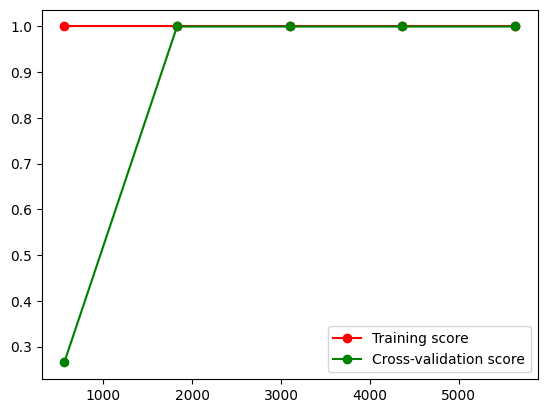

In [63]:
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# 'model' es el modelo supervisado (p.ej., LogisticRegression, RandomForest)
# y 'X' e 'y' son los datos y etiquetas, respectivamente

# Realiza la validación cruzada
scores = cross_val_score(model, X, y, cv=5)

# Imprime los scores de la validación cruzada
print("Scores de la validación cruzada: ", scores)
print("Media de los scores: ", np.mean(scores))

# Genera las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Calcula la media y la desviación estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica las curvas de aprendizaje
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()


- La línea roja representa el “**Training score**”, es decir, el rendimiento del modelo en el conjunto de entrenamiento. Si esta línea es alta, significa que el modelo está aprendiendo bien de los datos de entrenamiento.

- La línea verde representa el “**Cross-validation score**”, es decir, el rendimiento del modelo en un conjunto de validación que no se utiliza para el entrenamiento. Esta línea da una buena idea de cómo el modelo generalizará a nuevos datos.

- En este caso, ambas líneas están en el valor máximo de 1.0, lo que indica que el modelo tiene un rendimiento excelente tanto en el conjunto de entrenamiento como en el de validación. Esto podría ser una señal de que el modelo está sobreajustando los datos, especialmente si se tiene un conjunto de datos pequeño.

## Recomendaciones

---



Observando los resultados obtenidos, se puede deducir que el modelo está teniendo un rendimiento excelente en los datos de entrenamiento y validación. Aunque esto puede parecer ideal, también podría ser una señal de que el modelo está sobreajustando los datos. El sobreajuste ocurre cuando un modelo aprende tan bien los datos de entrenamiento que no generaliza bien a nuevos datos. Aquí se mencionan algunas recomendaciones para mejorar el rendimiento del modelo:

1. **Reducir la complejidad del modelo**: Si el modelo está sobreajustado, se puede intentar reducir la complejidad del modelo. Esto podría implicar eliminar algunas características, utilizar un modelo más simple o aumentar la regularización.

2. **Recopilar más datos**: Si es posible, recopilar más datos puede ayudar a mejorar el rendimiento del modelo. Los modelos de machine learning suelen obtener mejor rendimiento con mayor cantidad de datos.

3. **Probar diferentes algoritmos**: Cada algoritmo de machine learning tiene sus propias fortalezas y debilidades, y algunos algoritmos pueden funcionar mejor en ciertos tipos de datos o problemas que otros.

## Evaluación Sobre el Despliegue del Modelo en Producción

---



Desplegar un modelo de machine learning en producción puede ser un desafío, pero también es un paso crucial para obtener valor de tus modelos. Aquí se enumerarán algunas consideraciones que se podrían tener en cuenta:

1. **Establecer un nivel de rendimiento mínimo**: Antes de desplegar un modelo en producción, se debe establecer un nivel de rendimiento mínimo que el modelo debe alcanzar. Este nivel dependerá de las necesidades específicas de la aplicación. Por ejemplo, si se esta intentado conocer si una cantidad determinanda de clientes abandonarán o no una compañia de telocuminicaciones según información demográfica y personal, se podría decidir que el modelo debe ser capaz de predecir correctamente la tasa de abandono de los clientes al menos el 70% de las veces.

2. **Despliegue del modelo**: El proceso de despliegue del modelo puede variar dependiendo de la infraestructura. Algunas empresas utilizan servidores en la nube para alojar sus modelos, mientras que otras pueden tener sus propios servidores locales. Independientemente de la infraestructura que se utilice, es importante asegurarse de que el modelo esté alojado en un entorno que pueda manejar la carga de trabajo prevista.

3. **Monitoreo del rendimiento en producción**: Una vez que el modelo está en producción, es importante seguir monitorizando su rendimiento para asegurarse de que sigue funcionando como se espera. se puede hacer esto recogiendo regularmente datos de retroalimentación y utilizándolos para evaluar el rendimiento del modelo. Si el rendimiento del modelo comienza a disminuir, puede ser necesario reentrenarlo con nuevos datos.

4. **Actualización del modelo**: Los modelos de machine learning no son estáticos. A medida que se recogen más datos, es probable que se necesite reentrenar y actualizar el modelo para asegurarse de que sigue siendo relevante. Esto puede implicar ajustar los hiperparámetros del modelo, añadir nuevas características o incluso cambiar a un tipo de modelo completamente diferente.

In [64]:
print(X.columns)
print('\n',X.shape)

Index(['CLTV', 'Churn Score', 'Churn Value', 'City', 'Contract', 'Dependents',
       'Device Protection', 'Gender', 'Internet Service', 'Monthly Charges',
       'Multiple Lines', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service',
       'Senior Citizen', 'Streaming Movies', 'Streaming TV', 'Tech Support',
       'Tenure Months', 'KMeans_Clusters'],
      dtype='object')

 (7043, 23)
